# Operational Satellites
### Satellite database was assembled by the Union of Concerned Scientists (UCS)
* Current as of **1 Sept 2017**
* The database is a listing of the more than 1000 operational satellites currently in orbit around Earth
* https://www.ucsusa.org/nuclear-weapons/space-weapons/satellite-database#.WqHhO3UbPIo
* Data science perform by *Brendan Lane*

## Importing Data

In [24]:
# Load modules
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [25]:
# Load data
df = pd.read_csv('UCS_Satellite_Database.csv')

In [26]:
# Customize plotting theme
custom_style = {'axes.axisbelow': True,
                'axes.edgecolor': 'white',
                'axes.facecolor': '#3C4053',
                'axes.facecolor':'#3C4053',
                'figure.facecolor':'#3C4053',
                'axes.grid': True,
                'axes.labelcolor': 'grey',
                'axes.linewidth': 0,
                'grid.color': 'grey',
                'grid.linestyle': '-',
                'image.cmap': 'Greys',
                'legend.frameon': False,
                'legend.numpoints': 1,
                'legend.scatterpoints': 1,
                'lines.solid_capstyle': 'round',
                'pdf.fonttype': 42,
                'text.color': 'white',
                'xtick.color': 'white',
                'xtick.direction': 'out',
                'xtick.major.size': 0,
                'xtick.minor.size': 0,
                'ytick.color': 'white',
                'ytick.direction': 'out',
                'ytick.major.size': 0,
                'ytick.minor.size': 0}

sns.set(font_scale=2, style='darkgrid', rc=custom_style)

## Data Munging

In [27]:
# Remove columns with missing, incomplete, or not meaningful data
cols = ['Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 
        'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
        'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 
        'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54', 
        'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59',
        'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64',
        'Country/Org of UN Registry', 'Unnamed: 27', 'Source Used for Orbital Data',
        'Source', 'Source.1', 'Source.2', 'Source.3', 'Source.4', 'Source.5', 'Comments',
        'Power (watts)', 'Contractor', 'Country of Contractor', 'Detailed Purpose',
        'Country/Org of UN Registry', 'Power (watts)', 'COSPAR Number', 'NORAD Number',
        'Dry Mass (kg.)', 'Expected Lifetime']

df.drop(cols, axis='columns', inplace=True)

In [28]:
# Dropped over a hundred rows of missing satellite mass data from data table
df.dropna(subset=['Launch Mass (kg.)', 'Longitude of GEO (degrees)'],
          axis='rows', inplace=True)

In [61]:
# No duplicated rows
df[df.duplicated()]

,"Name of Satellite, Alternate Names",Country of Operator/Owner,Operator/Owner,Users,Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Date of Launch,Launch Site,Launch Vehicle,Month,Day,Year
1365,SB-WASS 3-6 (Space Based Wide Area Surveillanc...,USA,National Reconnaissance Office (NRO)/US Navy,Military,EarthObservation,LEO,Non-Polar Inclined,0.0,1012.0,1203.0,0.01280,63.4,107.4,6500.0,9/13/2012,Vandenberg AFB,Atlas 5,9,13,2012
1367,SB-WASS 3-7 (Space Based Wide Area Surveillanc...,USA,National Reconnaissance Office (NRO)/US Navy,Military,EarthObservation,LEO,Non-Polar Inclined,0.0,1014.0,1099.0,0.00572,63.4,107.4,6500.0,10/8/2015,Vandenberg AFB,Atlas 5,10,8,2015
1369,SB-WASS 3-8 (Space Based Wide Area Surveillanc...,USA,National Reconnaissance Office (NRO)/US Navy,Military,EarthObservation,LEO,Non-Polar Inclined,0.0,1009.0,1204.0,0.01300,63.4,107.4,6500.0,3/1/2017,Vandenberg AFB,Atlas 5,3,1,2017


In [30]:
# Nations active in space
df['Country of Operator/Owner'] = df['Country of Operator/Owner']. \
    apply(lambda x: x.replace(' ', ''))
    
print(df['Country of Operator/Owner'].unique())

['Finland' 'Denmark' 'Multinational' 'USA' 'Germany' 'Norway' 'Russia'
 'Kazakhstan' 'UnitedKingdom/ESA' 'Algeria' 'Spain' 'Canada' 'Uruguay'
 'Singapore/Japan' 'Argentina' 'USA/Argentina' 'China' 'ESA' 'Japan'
 'Luxembourg' 'India' 'France/Italy' 'Singapore' 'Azerbaijan' 'Turkey'
 'Belarus' 'Israel' 'Bangladesh' 'Brazil' 'Indonesia' 'Bulgaria'
 'France/USA' 'China/Brazil' 'UnitedKingdom' 'SouthKorea' 'Taiwan/USA'
 'Italy' 'Netherlands' 'Switzerland' 'UnitedArabEmirates' 'Mexico'
 'France' 'USA/Canada/Japan' 'USA/Japan/Brazil' 'Turkey/France'
 'Russia/Multinational' 'Taiwan' 'USA/Japan' 'Germany/USA'
 'France/Italy/Belgium/Spain/Greece' 'Greece/UnitedKingdom' 'Greece'
 'ESA/USA' 'Australia' 'ESA/USA/Russia' 'USA/France' 'Laos' 'Lithuania'
 'Morocco/Germany' 'Mongolia' 'Malaysia' 'India/France' 'USA/Canada'
 'Nigeria' 'Egypt' 'SouthAfrica' 'Sweden' 'Pakistan' 'Russia/USA' 'Peru'
 'Ukraine' 'Ukraine/China' 'Belgium' 'India/Canada' 'SaudiArabia' 'Iran'
 'Slovakia' 'France/Belgium/Sweden' 

## Preprocessing

In [31]:
# One-hot encoding countries
cvec = CountVectorizer(binary=True)
df_countries = pd.DataFrame(cvec.fit_transform(df['Country of Operator/Owner'].replace(' ', '')
                                              ).todense(), columns=cvec.get_feature_names())

In [32]:
# Replaces multiple countries with 'Multinational'
df['Country of Operator/Owner'] = df['Country of Operator/Owner']. \
    apply(lambda x: 'Multinational' if '/' in x else x)

In [33]:
# Cleaning the 'Users" columns
map_dict = {
    'Civil': 'Civil',
    'Commercial': 'Commercial',
    'Military': 'Military',
    'Government': 'Government',
    'Military ': 'Military',
    'Military/Civil': 'Military/Civil',
    'Commercial/Military': 'Military/Commercial',
    'Military/Commercial': 'Military/Commercial',
    'Civil/Government': 'Government/Civil',
    'Government/Civil': 'Government/Civil',
    'Commercial/Government': 'Government/Commercial',
    'Government/Commercial': 'Government/Commercial',
    'Commerical': 'Commercial',
    'Military/Government': 'Government/Military',
    'Government/Military': 'Government/Military',
    'Commercial/Government/Military': 'Commercial/Government/Military'
}

df.Users = df.Users.map(map_dict)

In [34]:
# One-hot encoding 'Users'
df_users = pd.DataFrame(cvec.fit_transform(df.Users).todense(), 
                        columns=cvec.get_feature_names())

In [35]:
# One-hot encoding 'Class of Orbit'
df['Class of Orbit'] = df['Class of Orbit'].apply(lambda x: x.strip())
df_orbit_class = pd.DataFrame(cvec.fit_transform(df['Class of Orbit']).todense(), 
                              columns=cvec.get_feature_names())

In [36]:
# One-hot encoding 'Type of Orbit'
orbs = df['Type of Orbit'].dropna()
orbs = orbs.apply(lambda x: x.replace(' ', ''))
orbs = orbs.apply(lambda x: x.replace('-', ''))
df_orbit_type = pd.DataFrame(cvec.fit_transform(orbs).todense(), 
                             columns=cvec.get_feature_names())

In [37]:
# One-hot encoding 'Purpose'
df.Purpose = df.Purpose.apply(lambda x: x.replace(' ', ''))
df_purpose = pd.DataFrame(cvec.fit_transform(df.Purpose).todense(), 
                          columns=cvec.get_feature_names())

In [38]:
# Converting columns to floats
df['Perigee (km)'] = df['Perigee (km)'].apply(lambda x: float(x.replace(',', '')))
df['Apogee (km)'] = df['Apogee (km)'].apply(lambda x: float(x.replace(',', '')))
df['Period (minutes)'] = df['Period (minutes)'].apply(lambda x: x.replace(',', ''))
df['Period (minutes)'] = df['Period (minutes)'].apply(lambda x: x.replace('8 days', '11520'))
df['Period (minutes)'] = df['Period (minutes)'].apply(lambda x: float(x))
df['Launch Mass (kg.)'] = df['Launch Mass (kg.)'].apply(lambda x: x.replace(',', ''))
df['Launch Mass (kg.)'] = df['Launch Mass (kg.)'].apply(lambda x: x.replace('+', ''))
df['Launch Mass (kg.)'] = df['Launch Mass (kg.)'].apply(lambda x: float(x))

In [39]:
# Extracting month, day, and year
date = [x.split('/') for x in df['Date of Launch']]
df.loc[:, 'Month'] = [x[0] for x in date]
df.loc[:, 'Day'] = [x[1] for x in date]
df.loc[:, 'Year'] = [x[2] for x in date]

In [40]:
# One-hot encoding 'Month'
df_month = pd.get_dummies(df.Month, prefix='Month')
# One-hot encoding 'Day'
df_day = pd.get_dummies(df.Day, prefix='Day')
# One-hot encoding 'Year'
df_year = pd.get_dummies(df.Year, prefix='Year')
# One-hot encoding 'Launch Sites'
df_launchsite = pd.get_dummies(df['Launch Site'])

In [41]:
# Classifies satellite based on mass
# https://en.wikipedia.org/wiki/Small_satellite
mass_class = []
for weight in df['Launch Mass (kg.)']:
    if weight <= 1:
        mass_class.append('pico')
    elif weight <= 10:
        mass_class.append('nano')
    elif weight <= 100:
        mass_class.append('micro')
    elif weight <= 500:
        mass_class.append('mini')
    elif weight <= 1000:
        mass_class.append('medium')
    else:
        mass_class.append('large')

df_weight_class = pd.DataFrame(mass_class, columns=['Class'])

## Exploratory Data Analysis
### Satellite Masses

In [43]:
# Histograph creator
def hist_plot(data, title, xlabel, bins=None):
    plt.figure(figsize=(12, 6))
    plt.hist(data, bins=bins, color='#0000ff', alpha=0.8)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Number of Satellites')
    plt.show()

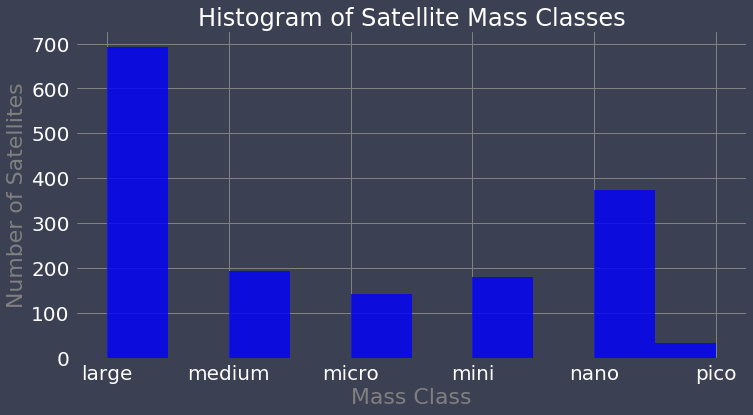

In [44]:
# Satellite mass class histogram
data = df_weight_class
hist_plot(data, 'Histogram of Satellite Mass Classes', 'Mass Class')

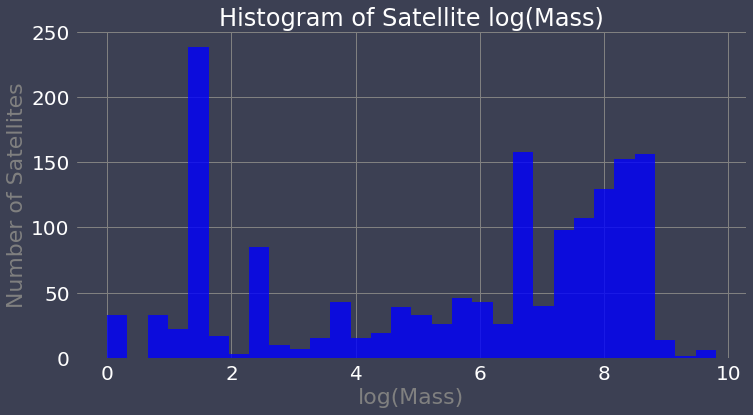

In [45]:
# Satellite mass class histogram
data = np.log(df['Launch Mass (kg.)'])
hist_plot(data, 'Histogram of Satellite log(Mass)', 'log(Mass)', 30)

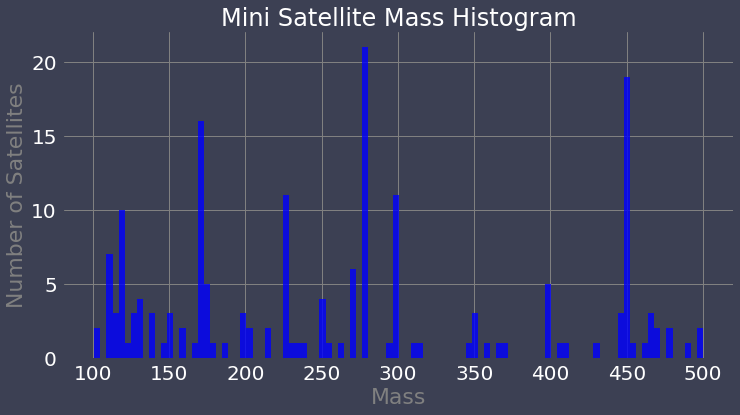

In [52]:
# Mini satellite mass class histogram
data = df[(df['Launch Mass (kg.)'] <= 500) & (df['Launch Mass (kg.)'] > 100)]['Launch Mass (kg.)']
hist_plot(data, 'Mini Satellite Mass Histogram', 'Mass', 100)

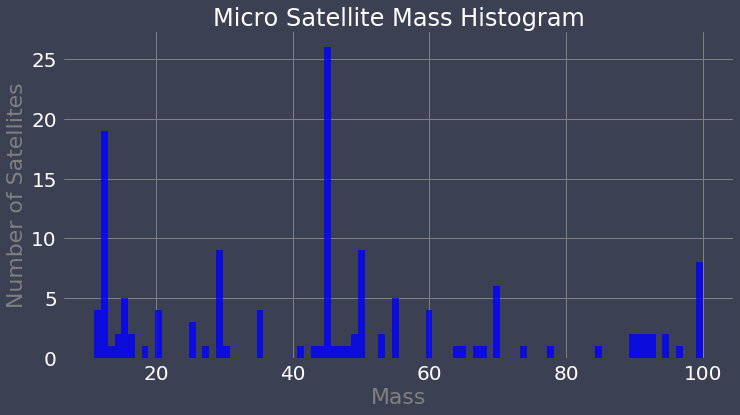

In [53]:
# Micro satellite mass class histogram
data = df[(df['Launch Mass (kg.)'] <= 100) & (df['Launch Mass (kg.)'] > 10)]['Launch Mass (kg.)']
hist_plot(data, 'Micro Satellite Mass Histogram', 'Mass', 90)

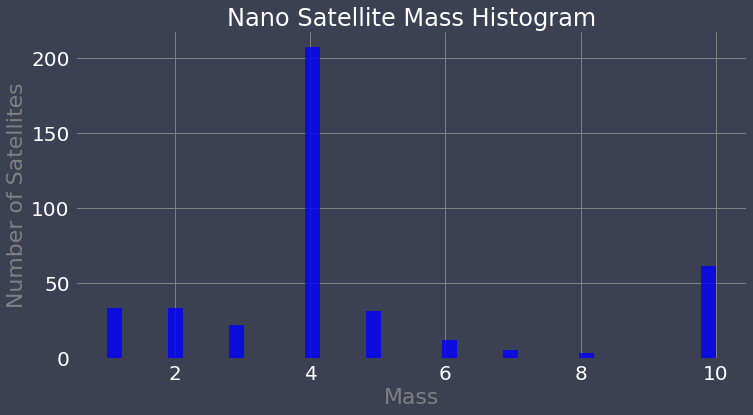

In [54]:
# Nano satellite mass class histogram
data = df[df['Launch Mass (kg.)'] <= 10]['Launch Mass (kg.)']
hist_plot(data, 'Nano Satellite Mass Histogram', 'Mass', 40)

### Satellite Count per Country

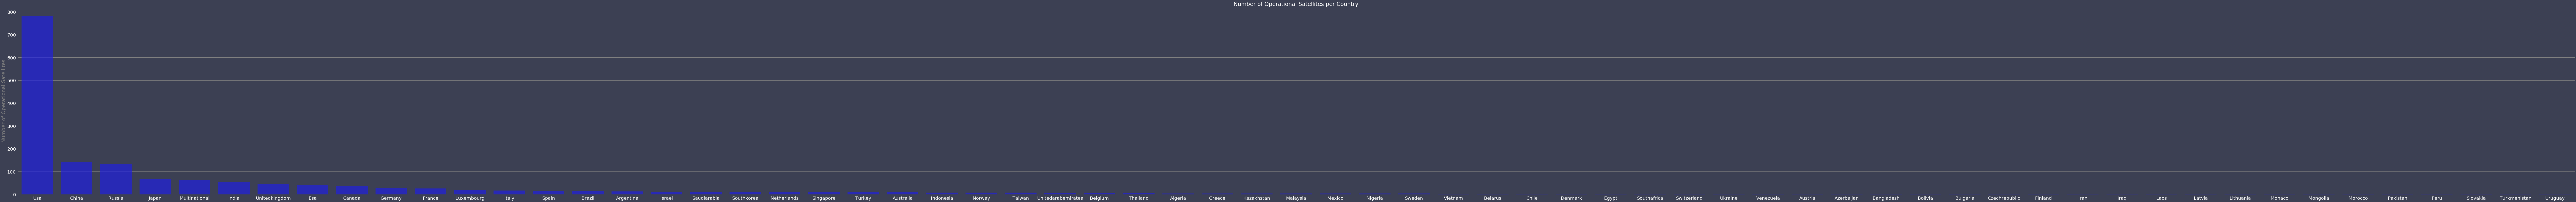

In [86]:
# Number of satellites per country
n_sats = [sum(df_countries[col]) for col in df_countries]
country_sat_pair = list(zip(df_countries.columns, n_sats))

# Sort results
country_sat_pair.sort(key=lambda x: x[1], reverse=True)
country = [c[0].capitalize() for c in country_sat_pair]
n_sats = [c[1] for c in country_sat_pair]

# Plotting results
plt.figure(figsize=(200, 15))
sns.barplot(country, n_sats, color='#0000ff', alpha=0.7)
plt.title('Number of Operational Satellites per Country')
plt.ylabel('Number of Operational Satellites')
plt.show()
# *Right-click* bar chart and 'Open image in new tab' and zoom in

### Total Satellite Mass per Country

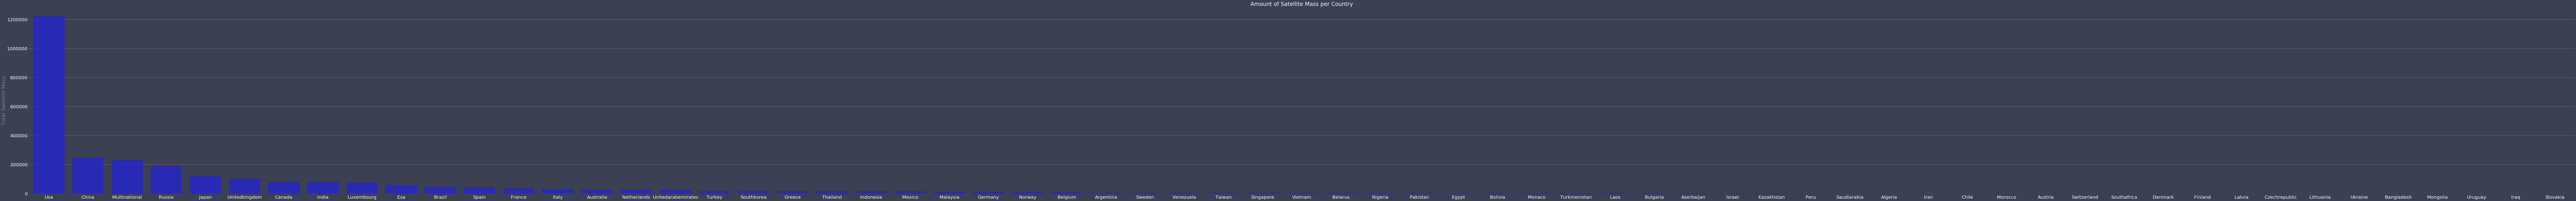

In [85]:
# Satellite mass and country information
data = pd.concat([df['Launch Mass (kg.)'].reset_index(), df_countries.reset_index()], 
                 axis=1).drop('index', axis=1)

# Total operational satellite mass in space
mass = []
for col in data.columns:
    mass.append((col, data[data[col] == 1]['Launch Mass (kg.)'].sum()))
    
# Drop unnecessary info
mass = mass[1:]

# Sort results
mass.sort(key=lambda x: x[1], reverse=True)
country = [c[0].capitalize() for c in mass]
masses = [c[1] for c in mass]

# Plotting results
plt.figure(figsize=(200, 15))
sns.barplot(country, masses, color='#0000ff', alpha=0.7)
plt.title('Amount of Satellite Mass per Country')
plt.ylabel('Total Satellite Mass')
plt.show()
# *Right-click* bar chart and 'Open image in new tab' and zoom in

In [ ]:
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('fit', aosdjff())
])
pipe.fit(data)
pipe.predict(data)

In [ ]:
params = {'fit__n_neighbors': range(1,25)}

In [ ]:
gs = GridSeartchCV(pipe, params)

In [ ]:
gs.fit()

### Clustering

In [ ]:
# Assign clustering features
data = [df['Period (minutes)'].reset_index(), df_purpose.reindex()]
# Create data frame
data = pd.concat(data, axis='columns')

print('Null count: {}'.format(data.isnull().sum().sum()))
print('Data rows:  {}'.format(data.shape[0]))
print('Data cols:  {}'.format(data.shape[1]))

In [ ]:
# Scaling the data
ss = StandardScaler()
data_ss = ss.fit_transform(data)

# Principal Component Analysis (PCA)
pca = PCA()
data_pca = pca.fit_transform(data_ss)
# Plot PCA explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Total number of dimensions')
plt.ylabel('Resolution (%)')
plt.title('Cumulative Explained Variance')
plt.show()

In [ ]:
def plot_clusters(df, title):
    fig, ax = plt.subplots(figsize=(10,10))
    
    colors = plt.cm.Spectral(np.linspace(0, 1, len(df.label.unique())))
    
    for label, color in zip(df.label.unique(), colors):
        X = df[df.label == label]
        ax.scatter(X.iloc[:,0], X.iloc[:,1], s=70, 
                   color=color, label=label, alpha=0.9)
        
    ax.set_title(title, fontsize=20)
    ax.legend(loc='lower right')
    
    plt.show()

In [ ]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=120)
XX = pd.DataFrame(X)
cluster_labels = clusterer.fit_predict(XX)
XX['label'] = cluster_labels
plot_clusters(XX, 'Rocket!')

In [ ]:
XX = pd.DataFrame(X)

clusterer = hdbscan.HDBSCAN(min_cluster_size=n)
cluster_labels = clusterer.fit_predict(XX)

In [ ]:
clusterer = KMeans(n_clusters=3)
cluster_labels = clusterer.fit_predict(XX)
XX['label'] = cluster_labels
plot_clusters(XX, 'Rocket!')

In [ ]:
display(HTML(df.to_html()))